<a href="https://colab.research.google.com/github/jaeyoungphysics/ML/blob/main/2_Logistic%26Softmax_Regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

In [1]:
#Colab에서 inline plot 그리기 위한 설정
%matplotlib inline 
import torch # PyTorch import
import numpy as np # numpy import
import matplotlib.pyplot as plt # 그림을 그리기 위한 matplotlib 사용

### **1) Logistic Regression의 이론적 배경**

이진 분류(Binary Classification)을 수행하는 로지스틱 회귀(Logistic Regression)에 대해 알아보고, PyTorch를 사용해 직접 모델을 만들어본다


*   **이진 분류 (Binary Classification)**\
분류하고자 하는 문제에 대한 정의

*   **시그모이드 함수 (Sigmoid function)**\
Logistic Regression의 가설 함수인 시그모이드 함수의 이해

*   **바이너리 크로스 엔트로피 (Binary Cross Entropy)**\
Logistic Regression의 손실 함수인 BCE의 이해








##### **1-1) Binary Classification**

이진 분류란 input으로 받은 데이터를 둘 중 하나의 class로 분류하는 작업을 의미한다

예를 들어 아래와 같은 시험 성적 - 합불 여부에 대한 데이터가 있다고 하자

|Score ($x$)|Result ($y$)|
|:---------:|:----------:|
|45         |Fail        |
|50         |Fail        |
|55         |Fail        |
|60         |Pass        |
|65         |Pass        |
|70         |Pass        |

이 데이터에서 Fail을 0, Pass를 1로 표시하여 score-result 그래프를 그리면 다음과 같다

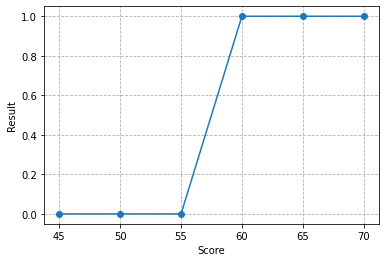

In [2]:
# numpy와 matplotlib을 사용해 그래프 그리기
score = np.array([45, 50, 55, 60, 65, 70])
result = np.array([0, 0, 0, 1, 1, 1])
plt.plot(score, result, 'o-')
plt.xlabel("Score")
plt.ylabel("Result")
plt.grid(linestyle='--')
plt.show()

이전 Linear Regression에서 사용한 $y= Wx + b$ 같은 함수로는 위 데이터를 제대로 표현할 수 없다

즉, Logistic Regression에서는 Linear Regression에서 사용한 것과 다른 함수를 가설(Hypothesis)로 삼아야 한다

위와 같은 모양의 그래프를 잘 표현할 수 있는 함수 $H(x) = f(Wx+b)$ 중 가장 널리 알려진 것이 바로 시그모이드 함수(Sigmoid function)이다

##### **1-2) Sigmoid function**

Sigmoid function의 정의는 다음과 같다

$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)$

Linear Regression은 $H(x)=Wx+b$ 를 hypothesis로 삼아 데이터를 가장 잘 표현하는 $W, b$ 값을 찾는 것이 목표였다

Logistic Regression 또한 $H(x) = \frac{1}{1 + e^{-(Wx+b)}}$ 를 가설로 삼아 데이터를 가장 잘 표현하는 $W, b$ 값을 찾는 것이 목표이다

다양한 $W, b$ 값에 따른 Sigmoid function의 그래프는 다음과 같다

In [3]:
# numpy를 사용하여 시그모이드 함수 정의
def sigmoid(x):
    return 1/(1+np.exp(-x))

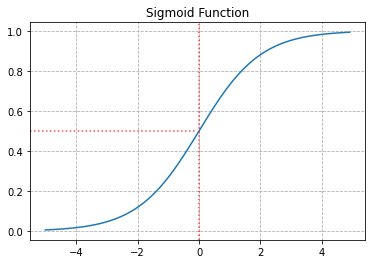

In [4]:
# W = 1, b = 0 인 경우 sigmoid function의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.grid(linestyle='--')
plt.axvline(0, 0, 1, color='r', linestyle=':', alpha=0.7)
plt.axhline(0.5,0, 0.5, color='r', linestyle=':', alpha=0.7)
plt.title('Sigmoid Function')
plt.show()

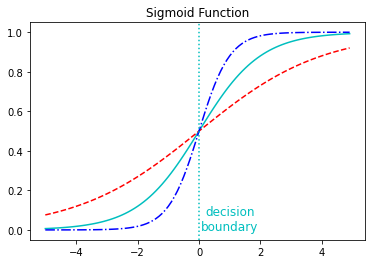

In [5]:
# 다양한 W값에 대한 sigmoid function의 그래프 (b=0 고정)
# W값이 커질수록 가운데 점선에 붙는 모양의 그래프가 나온다

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)      # W = 1
y2 = sigmoid(0.5*x)  # W = 0.5
y3 = sigmoid(2*x)    # W = 2

plt.plot(x, y1, 'c') # W의 값이 1일때
plt.plot(x, y2, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y3, 'b', linestyle='-.') # W의 값이 2일때
plt.axvline(0, 0, 1, color='c', linestyle=':')
plt.text(1, 0, "decision\nboundary", fontsize=12, color="c", ha="center")
plt.title('Sigmoid Function')
plt.show()

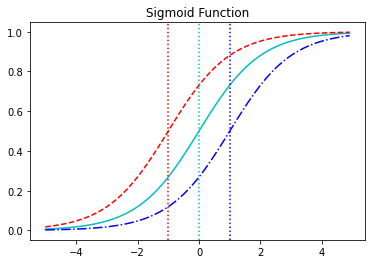

In [6]:
# 다양한 b값에 대한 sigmoid function의 그래프 (W=1 고정)
# b값에 따라 그래프가 좌우로 이동함을 알 수 있다

x = np.arange(-5.0, 5.0, 0.1)

y1 = sigmoid(x)     # b = 0
y2 = sigmoid(x+1)   # b = 1
y3 = sigmoid(x-1)   # b = -1

plt.plot(x, y1, 'c') # b의 값이 0일때
plt.plot(x, y2, 'r', linestyle='--') # b의 값이 1일때
plt.plot(x, y3, 'b', linestyle='-.') # b의 값이 -1일때
plt.axvline(0, 0, 1, color='c', linestyle=':')
plt.axvline(-1, 0, 1, color='r', linestyle=':')
plt.axvline(1, 0, 1, color='b', linestyle=':')
plt.title('Sigmoid Function')
plt.show()

Sigmoid function은 **출력값이 0 부터 1 사이의 값을 가지며,** 입력값이 커지면 1로, 작아지면 0으로 수렴한다

이러한 특성을 이용해 Sigmoid function을 분류 작업에 사용 할 수 있다

예를 들어 임계값을 0.5로 정할 경우, 어떤 데이터 input값에 대해 output이 0.5 이상이면 1, 아니면 0으로 판단할 수 있다

즉, 적절한 임계값(threshold)를 정하여 데이터를 분류할 기준이 되는 Decision boundary를 만들 수 있다

##### **1-3) Binary Cross Entropy**

Logistic Regression을 위한 hypothesis를 sigmoid function으로 정하였다

다음으로 최적의 $W, b$ 값을 찾기 위한 loss function을 정의해야 한다

Hypothesis가 달라졌기 때문에 Linear Regression에서 사용한 MSE(Mean Square Error)를 그대로 loss function으로 사용할 수 없다

MSE의 식은 다음과 같았다

$loss(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$

만약 이 식의 $H(x)$에 $H(x) = Wx + b$ 가 아니라 $H(x) = sigmoid(Wx+b)$ 를 넣게 된다면 다음과 같은 그래프를 얻는다

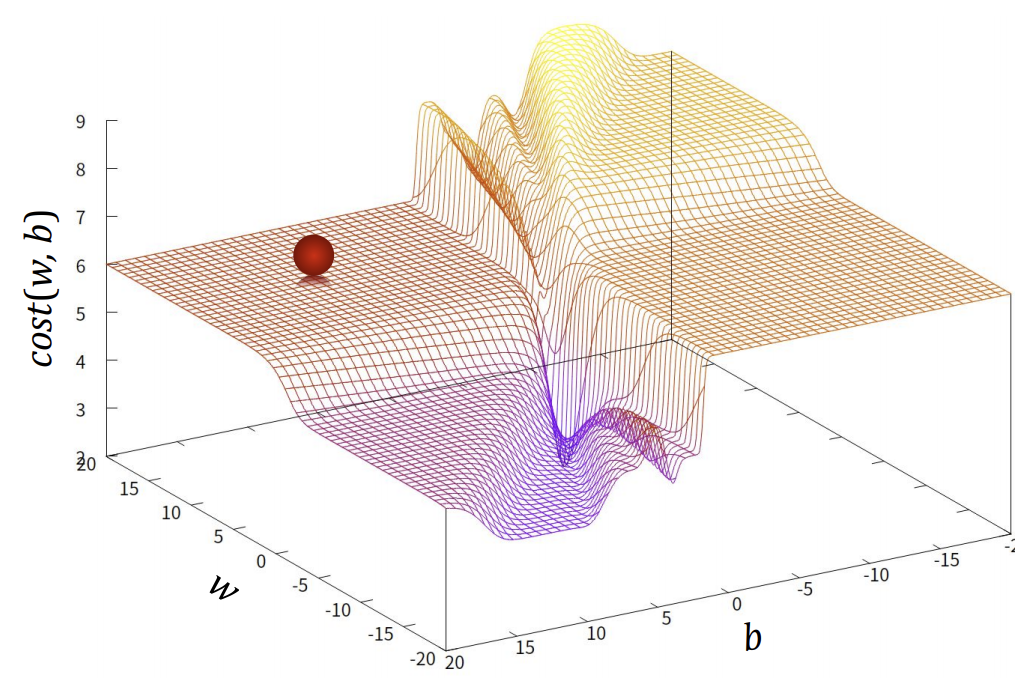

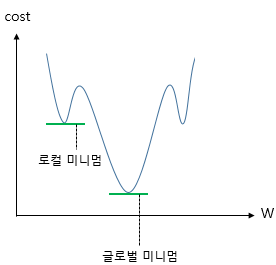

Logistic Regression도 마찬가지로 경사하강법(Gradient Descent)를 사용하여 loss 함수가 최소값이 되는 지점의 $W, b$ 를 찾는다

위와 같이 sigmoid function을 hypothesis 삼아서 MSE loss를 사용한다면, 많은 수의 local minimum이 생기게 된다

GD는 이런 local minimum과 원래 목표로 했던 global minimum을 구별할 수 없으므로, 학습이 잘못되어 local minimum으로 $W, b$가 빠지더라도 모델을 개선할 방법이 없다

따라서 Logistic Regression은 다른 종류의 loss function을 사용한다

우리의 모델은 실제 값이 1일 때, 예측값이 1에 가까울수록 loss가 작고 0에 가까울수록 loss가 커야한다

마찬가지로 실제 값이 0일 때, 예측값이 0에 가까울수록 loss가 작고 1에 가까울수록 loss가 커야한다

아래와 같이 로그 함수를 사용하면 이 조건을 만족하는 좋은 loss function을 만들 수 있다

$\text{if } y=1 → \text{cost}\left( H(x), y \right) = -\log(H(x))$\
$\text{if } y=0 → \text{cost}\left( H(x), y \right) = -\log(1-H(x))$

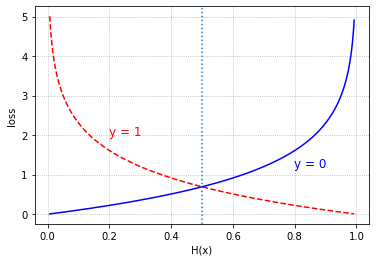

In [7]:
# log 함수를 사용하여 loss function을 그리는 예시
x = np.arange(-5., 5., 0.1)
y = sigmoid(x)

y1 = -1*np.log(y)    # 실제값=1 인 경우, -log(H(x)) 를 사용하면 H(x)가 1에 가까울수록 loss가 작고, 0에 가까울수록 발산
y2 = -1*np.log(1-y)  # 실제값=0 인 경우, -log(1-H(x)) 를 사용하면 H(x)가 0에 가까울수록 loss가 작고, 1에 가까울수록 발산

plt.plot(y,y1, 'r--')
plt.plot(y,y2, 'b')
plt.grid(linestyle=':')
plt.axvline(0.5, 0, 1, linestyle=':')
plt.text(0.25, 2, "y = 1", fontsize=12, color="r", ha="center")
plt.text(0.85, 1.2, "y = 0", fontsize=12, color="b", ha="center")
plt.xlabel('H(x)')
plt.ylabel('loss')
plt.show()

따라서 우리는 이 식을 조합하여 Logistic Regression에 사용할 새로운 loss function을 다음과 같이 정의할 수 있다

$\text{loss}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]$

여기서 실제값($y$)가 1이면 좌변의 우측항이 사라지고, 실제값($y$)이 0이면 좌변의 좌측항이 사라지므로 위 조건을 한 식으로 모두 표현 가능하다

Linear Regression에서 모든 오차 제곱을 평균내어 사용하엿듯, 새로운 loss function 또한 데이터의 개수로 나눠주어 그 평균값을 사용한다

따라서 최종 loss function은 다음과 같다

$loss(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

이 식을 **Binary Cross Entropy (BCE)** 라고 한다

이제 필요한 hypothesis와 loss function를 모두 정의하였으므로 기존과 동일하게 GD를 사용해 모델을 업데이트 해 나가며 loss를 최소값으로 만드는 최적의 $W, b$값을 찾는다 

### **2) PyTorch로 Logistic Regression 구현**

##### **2-1) 직접 hypothesis, loss function 구현하기**

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

Logistic Regression을 수행하기 위해 sklearn 패키지에서 제공하는 iris 데이터셋을 사용하자

이는 3종류의 iris (iris-setosa, iris-versicolour, iris-virginica) 꽃을 각각 50송이씩 조사하여 총 150송이에 대한 꽃받침과 꽃잎의 길이, 너비를 cm 단위로 기록한 데이터다

이 중 우리는 iris virginica를 나머지 두 종류의 iris와 구분하고자 한다

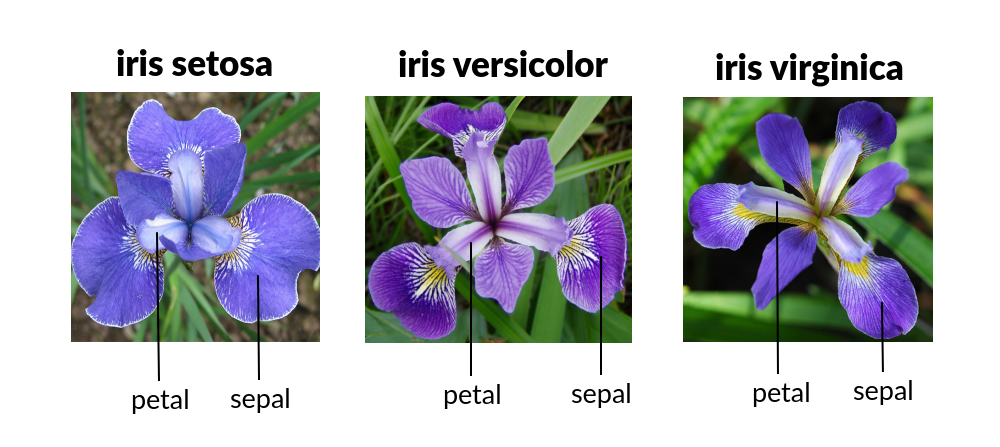

In [ ]:
# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋에 어떤 정보가 들어가있는지 확인
list(iris.keys()) 

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
# iris 데이터셋에 대한 상세한 설명

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# x, y 모두 numpy 배열로 저장

# x에 꽃잎의 너비를 저장
x_data = iris["data"][:,3:] 

# y에 꽃이 iris virginica면 1, 아니면 0을 저장
y_data = np.array((iris["target"]==2), dtype=int)

In [ ]:
x_data

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [ ]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# PyTorch로 학습이 가능하도록 torch tensor로 데이터 변환

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# 데이터 크기 확인

print(x_train.shape)
print(y_train.shape)

torch.Size([150, 1])
torch.Size([150])


In [ ]:
# 학습에서 업데이트 될 가중치 초기화하며 선언

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
# Logistic Regression의 가설식 sigmoid function 선언
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [ ]:
# 현재 W, b = 0 이므로 hypothesis는 모두 0.5값을 반환해야 함

print(hypothesis)

tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 

다음으로, loss function인 BCE를 선언한다

$loss(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

In [ ]:
# 평균을 내기 전 loss
loss = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))

# 데이터 개수로 평균을 내준다
loss = loss.mean()

In [ ]:
print(loss)

tensor(0.6931, grad_fn=<MeanBackward0>)


따라서 전체 학습 코드는 아래와 같다

Epoch    0/1000 W: 0.076, b: -0.167 Loss: 0.693147
Epoch  100/1000 W: 3.052, b: -4.940 Loss: 0.236855
Epoch  200/1000 W: 4.117, b: -6.706 Loss: 0.193213
Epoch  300/1000 W: 4.858, b: -7.932 Loss: 0.172483
Epoch  400/1000 W: 5.440, b: -8.890 Loss: 0.159823
Epoch  500/1000 W: 5.922, b: -9.683 Loss: 0.151166
Epoch  600/1000 W: 6.335, b: -10.361 Loss: 0.144841
Epoch  700/1000 W: 6.697, b: -10.953 Loss: 0.140009
Epoch  800/1000 W: 7.018, b: -11.479 Loss: 0.136200
Epoch  900/1000 W: 7.307, b: -11.952 Loss: 0.133122
Epoch 1000/1000 W: 7.567, b: -12.377 Loss: 0.130611


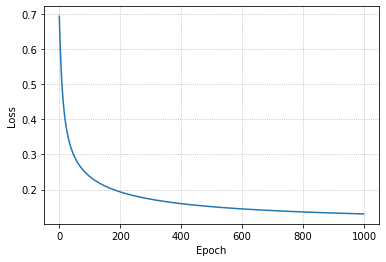

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

# x에 꽃잎의 너비를 저장
x_data = iris["data"][:,3:] 
# y에 꽃이 iris virginica면 1, 아니면 0을 저장
y_data = np.array((iris["target"]==2), dtype=int)

# PyTorch로 학습이 가능하도록 torch tensor로 데이터 변환
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 학습에서 업데이트 될 가중치 초기화하며 선언
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 학습에 사용할 optimizer 선언
optimizer = optim.SGD([W, b], lr=1)

# loss 그래프를 그리기 위한 numpy array 선언
l=[]
e=[]

nb_epochs = 1000
for epoch in range(nb_epochs):
  # Logistic Regression의 가설식 sigmoid function 선언
  hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
  # 혹은 PyTorch에서 제공하는 signoid 함수를 그대로 사용하여 hypothesis를 선언해도 된다
  # hypothesis = torch.sigmoid(x_train.matmul(W) + b)

  # 데이터 개수로 평균을 낸 loss 선언
  loss = (-(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))).mean()
  # 혹은 PyTorch에서 제공하는 BCE를 그대로 사용하여 선언해도 된다
  # loss = F.binary_cross_entropy(hypothesis, y_train)
  
  # 미분을 통해 W, b 업데이트
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # loss 그래프를 그리기 위한 numpy array 채우기
  e = np.append(e, epoch)
  l = np.append(l, loss.detach().numpy())

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
        epoch, nb_epochs, W.item(), b.item(), loss.item()
    ))
  if epoch == 999:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
        epoch+1, nb_epochs, W.item(), b.item(), loss.item()
    ))

# 학습 후 epoch - loss 그래프 그리기
plt.plot(e, l)
plt.grid(linestyle=":")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

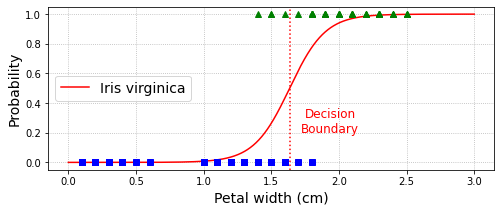

In [ ]:
# 학습된 모델을 사용해 꽃잎 너비에 따른 sigmoid function 예측값 확인
x_new = torch.FloatTensor(np.linspace(0, 3, 1000).reshape(-1, 1))
y_prob = 1 / (1 + torch.exp(-(x_new.matmul(W) + b)))

x_new = x_new.detach().numpy()
y_prob = y_prob.detach().numpy()

db = x_new[y_prob>=0.5][0]

plt.figure(figsize=(8,3))
plt.plot(x_new, y_prob, 'r', label='Iris virginica')
plt.plot(x_data[y_data==0], y_data[y_data==0], "bs")
plt.plot(x_data[y_data==1], y_data[y_data==1], "g^")
plt.axvline(db.item(), 0, 1, color='r', linestyle=":")
plt.text(db.item()+0.3, 0.2, "Decision\nBoundary", fontsize=12, color='r', ha='center')
plt.legend(loc="center left", fontsize=14)
plt.grid(linestyle=":")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.show()

위 학습에서는 꽃잎의 너비만을 사용하여 iris의 분류를 하였다

분류에는 둘 이상의 데이터를 사용할 수 있다

예를 들어 꽃잎의 너비와 길이 모두를 사용하여 학습을 진행하면 다음과 같이 학습 할 수 있다

Epoch    0/2000 W1: -0.006, W2: 0.015, b: -0.033 Loss: 0.693147
Epoch  100/2000 W1: 0.042, W2: 1.182, b: -2.078 Loss: 0.395018
Epoch  200/2000 W1: 0.046, W2: 1.827, b: -3.140 Loss: 0.315992
Epoch  300/2000 W1: 0.046, W2: 2.280, b: -3.883 Loss: 0.277746
Epoch  400/2000 W1: 0.047, W2: 2.632, b: -4.473 Loss: 0.253956
Epoch  500/2000 W1: 0.053, W2: 2.920, b: -4.975 Loss: 0.237162
Epoch  600/2000 W1: 0.060, W2: 3.163, b: -5.417 Loss: 0.224385
Epoch  700/2000 W1: 0.071, W2: 3.374, b: -5.816 Loss: 0.214178
Epoch  800/2000 W1: 0.083, W2: 3.559, b: -6.182 Loss: 0.205739
Epoch  900/2000 W1: 0.097, W2: 3.723, b: -6.522 Loss: 0.198583
Epoch 1000/2000 W1: 0.112, W2: 3.870, b: -6.841 Loss: 0.192397
Epoch 1100/2000 W1: 0.129, W2: 4.003, b: -7.142 Loss: 0.186968
Epoch 1200/2000 W1: 0.146, W2: 4.124, b: -7.427 Loss: 0.182144
Epoch 1300/2000 W1: 0.164, W2: 4.235, b: -7.699 Loss: 0.177814
Epoch 1400/2000 W1: 0.183, W2: 4.337, b: -7.959 Loss: 0.173894
Epoch 1500/2000 W1: 0.202, W2: 4.431, b: -8.208 Loss: 

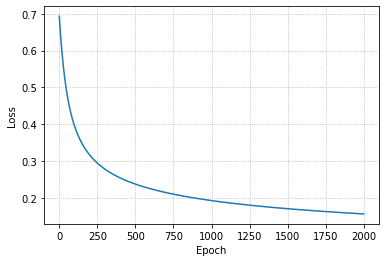

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

# x에 꽃잎의 너비를 저장
x_data = iris["data"][:,(2,3)] 
# y에 꽃이 iris virginica면 1, 아니면 0을 저장
y_data = np.array((iris["target"]==2), dtype=int)

# PyTorch로 학습이 가능하도록 torch tensor로 데이터 변환
x_train = torch.FloatTensor(x_data)
y_train = (torch.FloatTensor(y_data)).unsqueeze(1)  # 텐서 크기를 맞추기 위해 unsqueeze를 사용해 차원 추가

# 학습에서 업데이트 될 가중치 초기화하며 선언
W = torch.zeros((2,1), requires_grad=True) # input X가 150x2 행렬이므로 가중치는 2x1 행렬이 되어야 연산 가능
b = torch.zeros(1, requires_grad=True)

# 학습에 사용할 optimizer 선언
optimizer = optim.SGD([W, b], lr=2e-1)

# loss 그래프를 그리기 위한 numpy array 선언
l=[]
e=[]

nb_epochs = 2000
for epoch in range(nb_epochs):
  # Logistic Regression의 가설식 sigmoid function 선언
  #hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
  # 혹은 PyTorch에서 제공하는 signoid 함수를 그대로 사용하여 hypothesis를 선언해도 된다
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)

  # 데이터 개수로 평균을 낸 loss 선언
  # loss = (-(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))).mean()
  # 혹은 PyTorch에서 제공하는 BCE를 그대로 사용하여 선언해도 된다
  loss = F.binary_cross_entropy(hypothesis, y_train)
  
  # 미분을 통해 W, b 업데이트
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # loss 그래프를 그리기 위한 numpy array 채우기
  e = np.append(e, epoch)
  l = np.append(l, loss.detach().numpy())
  
  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W1: {:.3f}, W2: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
        epoch, nb_epochs, W[0].item(), W[1].item(), b.item(), loss.item()
    ))
  if epoch == 1999:
    print('Epoch {:4d}/{} W1: {:.3f}, W2: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
        epoch+1, nb_epochs, W[0].item(), W[1].item(), b.item(), loss.item()
    ))

# 학습 후 epoch - loss 그래프 그리기
plt.plot(e, l)
plt.grid(linestyle=":")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

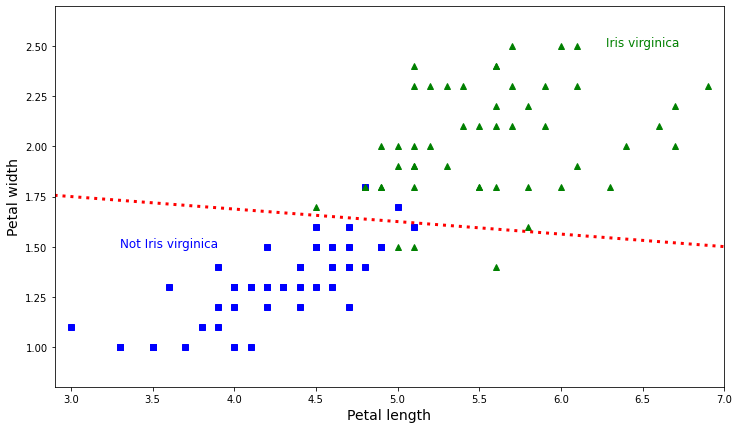

In [ ]:
# 학습된 모델을 사용해 꽃잎 너비, 길이에 따른 decision boundary 확인

plt.figure(figsize=(12, 7))
plt.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], "bs")
plt.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], "g^")
plt.axis([2.9, 7, 0.8, 2.7])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.text(3.6, 1.5, "Not Iris virginica", fontsize=12, color="b", ha="center")
plt.text(6.5, 2.5, "Iris virginica", fontsize=12, color="g", ha="center")

left_right = np.array([2.9, 7])
boundary = -(W[0].item()*left_right + b.item()) / W[1].item()
plt.plot(left_right, boundary, "r:", linewidth=3)

##### **2-2) nn.Module을 사용하여 구현**

Linear Regression의 경우와 마찬가지로 많이 사용되는 모델은 PyTorch 내부에 모두 구현되어 있다

nn.Sequential()을 사용하여 Logistic Regression 모델을 다음과 같이 만들 수 있다

In [ ]:
# Logistic regression 모델 선언

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1 , 즉 w1*x1 + w2*x2 + b
   nn.Sigmoid() # 위에서 선언한 w1*x1 + w2*x2 + b 식을 그대로 sigmoid function에 넣어서 H(x1, x2) 만들기
)

따라서 전체 학습 코드는 아래와 같다

Epoch    0/2000 W1: 0.181, W2: -0.356, b: -0.209 Loss: 0.811861 Acc: 33.33%
Epoch  100/2000 W1: 0.185, W2: 0.856, b: -2.234 Loss: 0.398031 Acc: 96.00%
Epoch  200/2000 W1: 0.172, W2: 1.540, b: -3.284 Loss: 0.317691 Acc: 96.00%
Epoch  300/2000 W1: 0.159, W2: 2.025, b: -4.017 Loss: 0.278610 Acc: 96.00%
Epoch  400/2000 W1: 0.150, W2: 2.403, b: -4.601 Loss: 0.254293 Acc: 96.00%
Epoch  500/2000 W1: 0.147, W2: 2.712, b: -5.096 Loss: 0.237158 Acc: 96.67%
Epoch  600/2000 W1: 0.148, W2: 2.974, b: -5.533 Loss: 0.224156 Acc: 96.67%
Epoch  700/2000 W1: 0.152, W2: 3.200, b: -5.927 Loss: 0.213799 Acc: 96.67%
Epoch  800/2000 W1: 0.159, W2: 3.398, b: -6.290 Loss: 0.205261 Acc: 96.67%
Epoch  900/2000 W1: 0.168, W2: 3.574, b: -6.626 Loss: 0.198039 Acc: 96.67%
Epoch 1000/2000 W1: 0.179, W2: 3.732, b: -6.941 Loss: 0.191812 Acc: 96.67%
Epoch 1100/2000 W1: 0.191, W2: 3.874, b: -7.239 Loss: 0.186357 Acc: 96.67%
Epoch 1200/2000 W1: 0.205, W2: 4.004, b: -7.521 Loss: 0.181520 Acc: 96.67%
Epoch 1300/2000 W1: 0.22

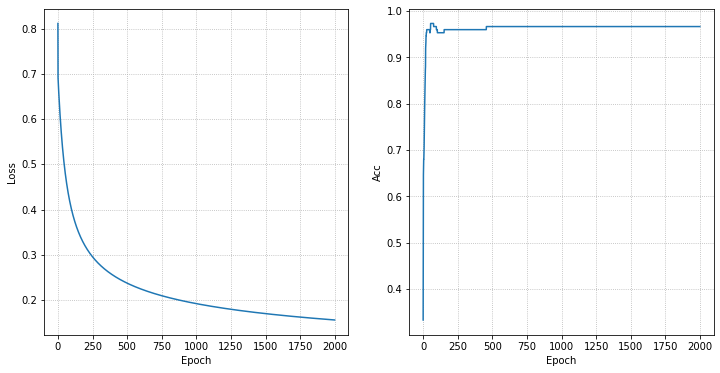

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

# x에 꽃잎의 너비를 저장
x_data = iris["data"][:,(2,3)] 
# y에 꽃이 iris virginica면 1, 아니면 0을 저장
y_data = np.array((iris["target"]==2), dtype=int)

# PyTorch로 학습이 가능하도록 torch tensor로 데이터 변환
x_train = torch.FloatTensor(x_data)
y_train = (torch.FloatTensor(y_data)).unsqueeze(1)  # 텐서 크기를 맞추기 위해 unsqueeze를 사용해 차원 추가

# Logistic regression 모델 선언, 이 과정에서 W, b도 모두 선언되고 랜덤으로 초기화된다
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1 , 즉 w1*x1 + w2*x2 + b
   nn.Sigmoid() # 위에서 선언한 w1*x1 + w2*x2 + b 식을 그대로 sigmoid function에 넣어서 H(x1, x2) 만들기
)

# 학습에 사용할 optimizer 선언
optimizer = optim.SGD(model.parameters(), lr=2e-1)

# loss 그래프를 그리기 위한 numpy array 선언
l=[]
e=[]
a=[]

nb_epochs = 2000
for epoch in range(nb_epochs):
  # Logistic Regression의 가설식을 앞서 만든 모델을 사용해 선언
  hypothesis = model(x_train)

  # BCE loss 선언
  loss = F.binary_cross_entropy(hypothesis, y_train)
  
  # 미분을 통해 W, b 업데이트
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # loss 그래프를 그리기 위한 numpy array 채우기
  e = np.append(e, epoch)
  l = np.append(l, loss.detach().numpy())

  # acc 계산 수행
  pred = (hypothesis >= torch.FloatTensor([0.5]))   # 모델의 예측값이 0.5를 넘으면 1로 간주
  real = (pred.float() == y_train)                  # 모델 예측 결과가 실제값과 같으면 1로 간주
  acc  = (real.sum().item()) / len(real)            # 전체 이벤트 중 올바른 이벤트의 비율로 acc 계산
  a    = np.append(a, acc)
  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W1: {:.3f}, W2: {:.3f}, b: {:.3f} Loss: {:.6f} Acc: {:2.2f}%'.format(
        epoch, nb_epochs, list(model.parameters())[0].squeeze().detach()[0].item(), list(model.parameters())[0].squeeze().detach()[1].item(), list(model.parameters())[1].squeeze().detach().item(), loss.item(), acc*100
    ))
  if epoch == 1999:
    print('Epoch {:4d}/{} W1: {:.3f}, W2: {:.3f}, b: {:.3f} Loss: {:.6f} Acc: {:2.2f}%'.format(
        epoch+1, nb_epochs, list(model.parameters())[0].squeeze().detach()[0].item(), list(model.parameters())[0].squeeze().detach()[1].item(), list(model.parameters())[1].squeeze().detach().item(), loss.item(), acc*100
    ))

# 학습 후 epoch - loss, epoch - acc 그래프 그리기
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(e, l)
plt.grid(linestyle=":")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(e,a)
plt.grid(linestyle=":")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.show()

# **Softmax Regression**

In [ ]:
#Colab에서 inline plot 그리기 위한 설정
%matplotlib inline 
import torch # PyTorch import
import numpy as np # numpy import
import matplotlib.pyplot as plt # 그림을 그리기 위한 matplotlib 사용

### **1) Softmax Regression의 이론적 배경**

다중 클래스 분류(Multi-Class Classification)을 수행하는 소프트맥스 회귀(Softmax Regression)에 대해 알아보고, PyTorch를 사용해 직접 모델을 만들어본다

*   **원-핫 인코딩 (One-Hot Encoding)**\
범주형 데이터를 처리하기 위해 라벨을 붙이는 방법을 알아본다

*   **다중 클래스 분류 (Multi-Class Classification)**\
분류하고자 하는 문제에 대한 정의

*   **소프트맥스 함수 (Softmax Function)**\
Softmax Regression의 가설 함수인 소프트맥스 함수의 이해

*   **크로스 엔트로피 (Binary Cross Entropy)**\
Softmax Regression의 손실 함수인 CE의 이해

##### **1-1) One-Hot Encoding**

One-hot encoding은 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법이다

예를 들어 뮤온, 전자, 쿼크 세 가지 선택지가 있다고 하자

뮤온에는 0번 인덱스, 전자에는 1번 인덱스, 쿼크에는 2번 인덱스를 임의로 부여하면 one-hot encoding이 된 벡터는 다음과 같다

$뮤온 = [1, 0, 0]$\
$전자 = [0, 1, 0]$\
$쿼크 = [0, 0, 1]$

총 선택지가 3가지 이므로 세 벡터 모두 3차원 벡터가 된다

위와 같이 one-hot encoding으로 표현된 벡터를 **원-핫 벡터(one-hot vector)**라고 한다

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 라벨 (0, 1)이 아니라 클래스의 개수만큼 숫자 라벨이 필요하다

여기서 위와 같이 one-hot encoding을 하지 않고 분류해야 할 클래스 전체에 정수 인코딩을 하는 방법 또한 가능 할 것이다

예를 들어, 소는 1, 말은 2, 돼지는 3 과 같은 식으로 숫자 라벨을 부여할 수 있다

그러나 이 경우 one-hot encoding과는 달리, 오차 값이 달라진다는 문제가 생긴다

예를 들어, loss function으로 MSE를 사용한다고 하자

$Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2$

실제값이 소일 때, 예측값에 따른 오차의 제곱은 다음과 같다

|    |소    |  말  |   돼지  |
|----|:-----:|:-----:|:------:|
|err |$0$    |$1$    |$4$     |

이는 소가 돼지보다 말에 가깝다는 정보를 학습하는 모델에 전달하게 될 여지가 있다

이런 클래스의 순서에 따른 정보를 전달해야 하는 분류 모델 또한 존재하나, 많은 경우 클래스 사이의 순서가 의미를 가지지 않는다

따라서 많은 경우 클래스의 순서와 상관 없이 클래스 간의 오차가 균일하도록 만들어주는 방법이 옳다

One-hot encoding을 통해 만든 라벨은 클래스 사이의 오차 제곱이 균등한 것을 다음과 같이 확인 할 수 있다

$((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$\
$((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$

##### **1-2) Multi-class Calssification**

이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 한다

앞서 사용한 iris 데이터셋에는 총 세 종류의 iris 데이터가 존재한다

Logistic regression을 이용하여 iris-virginica와 나머지 두 종류의 iris를 분류할 수 있었다

만약 이 세 종류의 꽃을 모두 구분하려 한다면, Multi-class Calssification을 사용해야 한다



이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat{Y}$ 로 나타내고, 각 변수는 벡터 혹은 행렬이다

$\hat{Y}$ 은 예측값이라는 의미를 가지고 있으므로 가설식에서$H(x)$ 대신 사용되기도 한다


앞서 공부한 Logistic Regression을 도식화하면 다음과 같다

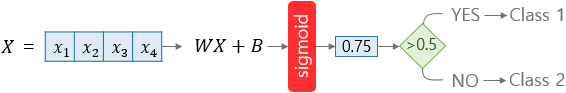

이 때, 출력이 0.75라는 것은 입력 데이터가 Class 1일 확률이 75%이고, 반대로 Class 2일 확률은 0.25라는 의미가 된다

두 확률의 총 합은 1이 된다

각 클래스에 속할 확률 총 합이 1이 된다는 점에서 착안하여 다중 클래스 분류 또한 비슷한 방법으로 수행할 수 있다

이를 도식화하면 다음과 같다

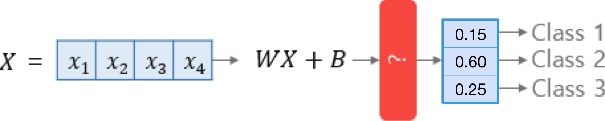

입력 데이터에 대하여, 적절한 가설 함수를 거친 후 출력은 각 클래스에 속할 확률을 나타내고, 이 확률들의 총 합은 1이다

여기서 입력 데이터가 거치는 적절한 가설 함수를 Softmax function이라고 부른다

##### **1-3) Softmax function**

위에서 언급했듯, 분류하고자 하는 클래스의 개수를 k개라고 할 때 softmax function은 k차원 벡터를 입력받고 각 클래스에 속할 확률을 출력해준다

k차원 벡터에서 i번째 원소를 $z_i$, i번째 클래스가 정답일 확률을 $p_i$로 나타낸다면, Softmax function은 확률 $p_i$를 다음과 같이 정의한다

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

위와 같이 쓰면, 모든 i에 대해서 $p_i$를 더한 값이 1이 나오는 것을 확인할 수 있다

우리는 3개의 클래스를 가진 예제를 풀고자 하므로, k=3으로 두고 진행해보자

k=3이므로, 입력으로 받는 벡터는 3차원 벡터 $z=[z_{1}\ z_{2}\ z_{3}]$가 된다

이 때, 이 벡터 $z$를 입력으로 받은 softmax function은 다음과 같은 출력을 리턴한다

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ , \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ , \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

$p_{1}, p_{2}, p_{3}$ 은 각각 인풋으로 받은 데이터의 실제 클래스가 1번일 확률, 2번일 확률, 3번일 확률을 나타낸다

각 $p_i$값은 0과 1 사이의 값을 가지며, 세 값을 모두 더하면 1이 나온다

여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타낸다

여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정해보자

이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이므로 원하는대로 바꿀 수 있다

이에따라 식을 문제에 맞게 다시 쓰면 아래와 같다

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ , \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ , \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]$


위 내용을 정리하고, 아직 해결하지 못한 부분을 다시 도식화 하면 아래와 같다

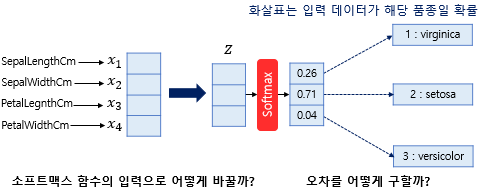

먼저 위 도식의 첫 번째 질문을 고려해보자

하나의 데이터 샘플은 총 4개의 독립 변수 $x_i, i=1, 2, 3, 4$를 가지고, 3가지 클래스 중 하나에 속한다

여기서 softmax function은 3차원 벡터를 입력값으로 받으므로, 다음과 같이 적절한 가중치 연산을 통해 현재의 4차원 벡터 데이터를 3차원 벡터로 변환해 주어야 한다

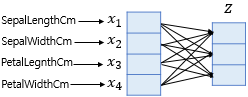

$
(x_1, x_2, x_3, x_4) \cdot \left(\begin{array}{r}w_{11} w_{12} w_{13}\\w_{21} w_{22} w_{23}\\ w_{31} w_{32} w_{33}\\ w_{41} w_{42} w_{43}\end{array}\right) + (b_1, b_2, b_3)= (z_1, z_2, z_3)
$

위 그림에서, 독립 변수 4개를 모두 적절한 가중치를 곱하여 3차원 입력 벡터를 만들어야 하므로, 필요한 가중치는 모두 $3\times4 = 12$개 이다

모델은 학습을 통해 이 12개의 가중치를 적절히 업데이트 할 것이며, 이를 통해 새롭게 만들어진 3차원 입력벡터가 다시 softmax function을 통과하고 예측값을 반환하게 된다

이 예측값은 다시 데이터의 실제 라벨과 값을 비교하여 오차를 계산하고, 이를 토대로 가중치를 업데이트 하게 된다

그러면 두 번째 질문인 오차를 구하는 방법에 대해서 고려해보자

Softmax function의 출력은 분류하고자 하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가지고, 각 값은 각 클래스에 속할 확률을 나타낸다

그렇다면 이 예측값(출력)으로 오차를 구하기위해 비교할 수 있는 실제 값이 필요하다

이 실제값은 앞서 배운 one-hot vector를 통해 나타낼 수 있다

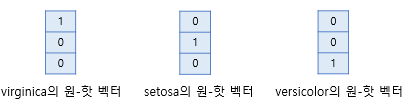

예를 들어 현재 모델에 입력해준 데이터의 실제 클래스가 setosa라면 다음과 같은 도식으로 나타낼 수 있다

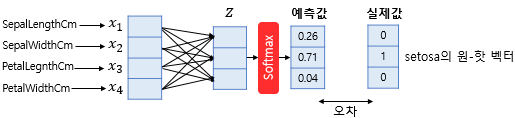

이 때, 예측값과 실제값 사이의 오차는 앞서 배운 BCE와 유사한 (사실 동일한) 크로스 엔트로피 (Cross Entropy)를 통해 계산 할 수 있다

이후 아래와 같이 계산된 오차값으로부터 가중치를 업데이트 하며 학습이 진행된다

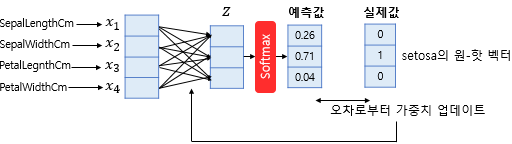

데이터 샘플 한 개에 대하여 softmax function에서 예측값을 구하는 연산을 도식화하면 아래와 같다

여기서 c는 클래스의 수 (여기선 3), f는 특성의 수 (여기선 4) 이다

만약 mini batch를 사용하지 않고 150개의 샘플을 한번에 모두 사용해 학습을 한다면 아래와 같은 예측값이 한 번에 150개가 출력된다

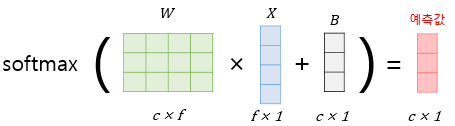

한 번에 5개의 샘플을 사용해 Softmax regression을 진행한다고 해보자

사용한 데이터 샘플은 다음과 같다

|     |sepal length ($x_1$)| sepal width ($x_2$)| petal length ($x_3$) | petal width ($x_4$)| species ($y$)|
|-----|:-------------------:|:------:|:---------:|:-------------------:|:----------:|
|1|5.1|3.5|1.4|0.2|setosa|
|2|4.9|3.0|1.4|0.2|setosa|
|3|5.8|2.6|4.0|1.2|versicolor|
|4|6.7|3.0|5.2|2.3|virginica|
|5|5.6|2.8|4.9|2.0|virginica|


데이터의 수가 5, 특성 수가 4이므로 입력 데이터는 $5\times4$ 행렬로 다음과 같이 적을 수 있다

$X=
\left(
    \begin{array}{c}
      5.1\ 3.5\ 1.4\ 0.2\ \\
      4.9\ 3.0\ 1.4\ 0.2\ \\
      5.8\ 2.6\ 4.0\ 1.2\ \\
      6.7\ 3.0\ 5.2\ 2.3\ \\
      5.6\ 2.8\ 4.9\ 2.0\ \\
    \end{array}
  \right)$


우선 이 입력 데이터를 그대로 두면 보기 힘드므로 다음과 같이 $x_{ij}$로 나타내자

$X=\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)$


다음으로 이 데이터를 입력하여 얻는 예측값 행렬 $\hat{Y}$은 $5\times3$ 행렬이 되어야 할 것이다 (각 데이터에 대한 출력값 총 5개, 어느 클래스에 속하는지 예측값 3개)

$\hat{Y}=\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$


  따라서 행렬 $X$를 입력하여 출력 $\hat{Y}$를 얻기 위해서는 다음과 같은 $4\times3$ 가중치 행렬이 필요하다

$W=\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)$

마지막으로 편향을 나타내는 행렬 $B$ 또한 행렬 크기를 맞추면 다음과 같이 $5\times3$ 행렬이 된다
$B=\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)$

  따라서 5개의 입력 데이터에 대한 softmax regression의 hypothesis는 다음과 같이 쓸 수 있다

$\hat{Y} = softmax(XW + B)$

$\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)
=
softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)$

##### **1-4) Cross Entropy**

아래에서 $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의한다

$y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_j$는 샘플 데이터가 $j$번째 클래스일 확률을 나타낸다 (표기에 따라서 $\hat{y_j}$로 표현하기도 한다)

이 때 Softmax Regression의 loss function인 Cross Entropy는 다음과 같이 정의된다

$loss(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$

예를 들어 어떤 k차원 one-hot vector에서 a번째 원소가 1이라고 하자 (해당 벡터에서 a번째 원소 이외의 나머지 원소는 모두 0이 된다)

즉, 해당 샘플의 실제 클래스는 a번째 클래스이다



이 때, $y_a = 1$이외의 $y_j$는 모두 0이므로, Cross Entropy는 결국 다음과 같이 정리가 된다

$-\sum_{j=1}^{k}y_{j}\ log(p_{j}) = -y_a\log(p_a) = -\log(p_a)$

이 때, $p_a$는 입력 데이터가 a번째 클래스에 속할 확률의 예측값이므로, 이 값이 1에 가까울수록 모델은 예측을 잘 한 것이고, 따라서 loss값은 작아져야 한다

여기서 $loss = -\log(p_a)$값은 $p_a$가 1에 가까울수록 0, 0에 가까울수록 발산한다

즉, 위에서 제시한 조건에 부합하므로, 적절한 loss값이라고 볼 수 있다

이 식을 전체 $n$개의 데이터에 대해 평균을 내어 다음과 같이 Softmax regression의 loss function을 정의한다

$loss(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

k=2로 두고 식을 전개하면, 위에서 정의한 Cross entropy는 결국 앞서 배웠던 BCE와 동일하다는 것을 확인 할 수 있다

$loss(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$

### **2) PyTorch로 Softmax Regression 구현**

### **2-1) 구현에 필요한 사항 파악**

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

In [ ]:
# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
# x에 꽃 정보 4가지 모두 저장
x_data = torch.FloatTensor(iris["data"])

In [ ]:
# x의 형태 확인
x_data.shape

torch.Size([150, 4])

In [ ]:
# 150개의 데이터에 대하 4종류의 정보가 저장되어 150x4 행렬임을 확인 가능
x_data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [ ]:
# iris 데이터셋은 setosa를 0, versicolor를 1, virginica를 2로 나타내고 있음
y = iris["target"]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# iris 데이터셋을 실제값으로 사용하기 위해 다음과 같은 one-hot encoding이 필요

y1 = torch.FloatTensor(iris["target"]==0).unsqueeze(1)
y2 = torch.FloatTensor(iris["target"]==1).unsqueeze(1)
y3 = torch.FloatTensor(iris["target"]==2).unsqueeze(1)

y_data = torch.cat([y1,y2,y3], dim=1)

In [ ]:
# 150x3 행렬이 잘 만들어 졌음을 확인 가능
y_data.shape

torch.Size([150, 3])

In [ ]:
# one-hot encoding된 실제 값들
y_data

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [ ]:
# 원래 구현에 필요한 순서는 다음과 같다 (코드 실행 불가능)

hypothesis = F.softmax(w*x, dim=1)  # 먼저 hypothesis인 softmax function 선언, input으로 x에 적절한 w를 곱한 입력 받음
loss = (y_data*-torch.log(hypothesis)).sum(dim=1).mean() # 이후 이 hypothesis를 log안에 넣고, 이를 다시 one-hot encoding된 y와 곱한 다음 평균내서 loss 구함

# 여기서 간편한 내장 함수를 사용할 수 있다
F.log_softmax(w*x, dim=1)  # log(softmax(w*x)) 를 간편히 한번에 적을 수 있다
loss = F.nll_loss(F.log_softmax(w*x, dim=1), y) #nll_loss는 원핫인코딩이 필요 없이 실제 값을 바로 인자로 받을 수 있고, loss값 계산을 수행한다
loss = F.cross_entropy(w*x, y)  # 위 모든 과정을 이 한 줄로 축소할 수 있다. cross_entropy 함수 안에는 이미 softmax 함수가 들어가 있다


### **2-2) Softmax Regression 직접 구현**

따라서 필요한 모든 코드를 한번에 적으면 다음과 같다

Epoch    0/2000 Loss: 1.098612
Epoch  100/2000 Loss: 0.419330
Epoch  200/2000 Loss: 0.251746
Epoch  300/2000 Loss: 0.205904
Epoch  400/2000 Loss: 0.176301
Epoch  500/2000 Loss: 0.155328
Epoch  600/2000 Loss: 0.139528
Epoch  700/2000 Loss: 0.127091
Epoch  800/2000 Loss: 0.116976
Epoch  900/2000 Loss: 0.108540
Epoch 1000/2000 Loss: 0.101364
Epoch 1100/2000 Loss: 0.095161
Epoch 1200/2000 Loss: 0.089730
Epoch 1300/2000 Loss: 0.084922
Epoch 1400/2000 Loss: 0.080628
Epoch 1500/2000 Loss: 0.076762
Epoch 1600/2000 Loss: 0.073260
Epoch 1700/2000 Loss: 0.070069
Epoch 1800/2000 Loss: 0.067145
Epoch 1900/2000 Loss: 0.064457
Epoch 2000/2000 Loss: 0.061997


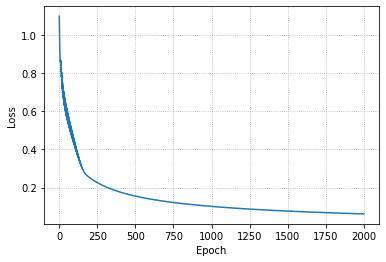

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

# x에 꽃 정보 4가지 모두 저장
x_data = iris["data"]
# iris 데이터셋을 실제값으로 사용하기 위해 다음과 같은 one-hot encoding이 필요
y1 = torch.FloatTensor(iris["target"]==0).unsqueeze(1)
y2 = torch.FloatTensor(iris["target"]==1).unsqueeze(1)
y3 = torch.FloatTensor(iris["target"]==2).unsqueeze(1)
y_data = torch.cat([y1,y2,y3], dim=1)

# PyTorch로 학습이 가능하도록 torch tensor로 데이터 변환
x_train = torch.FloatTensor(x_data)
y_train = (torch.FloatTensor(y_data))

# 학습에서 업데이트 될 가중치 초기화하며 선언
W = torch.zeros((4,3), requires_grad=True)  # 입력 X가 150x4 행렬이고 출력이 150x3 행렬이므로 가중치는 4x3 행렬이 되어야 연산 가능
b = torch.zeros((150,3), requires_grad=True)# 출력 150x3 행렬에 맞춰 선언

# 학습에 사용할 optimizer 선언
optimizer = optim.SGD([W, b], lr=1e-1)

# loss 곡선을 그리기 위한 준비
e = []
l = []

nb_epochs = 2000
for epoch in range(nb_epochs):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    loss = (y_train * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = np.append(e, epoch)
    l = np.append(l, loss.detach().numpy())

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Loss: {:.6f}'.format(
            epoch, nb_epochs, loss.item()
        ))
    if epoch == 1999:
        print('Epoch {:4d}/{} Loss: {:.6f}'.format(
            epoch+1, nb_epochs, loss.item()
        ))

plt.plot(e,l)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle=":")

### **2-3) nn.Module 사용하여 Softmax Regression 구현**

여기서는 F.cross_entropy()함수를 사용하여 필요한 softmax, log, loss 계산을 모두 수행 할 것이다

따라서 우리는 F.cross_entropy()에 들어갈 $Z = X\cdot W+B$ 행렬만 먼저 계산하면 된다

또한 F.cross_entropy()는 실제 라벨을 받아서 스스로 one-hot vector를 만들어주므로, one-hot encoding를 하지 않아도 된다

따라서 전체 코드는 아래와 같다

Epoch    0/2000 Loss: 1.753250 Acc: 33.33%
Epoch  100/2000 Loss: 0.465130 Acc: 67.33%
Epoch  200/2000 Loss: 0.266643 Acc: 96.67%
Epoch  300/2000 Loss: 0.220426 Acc: 97.33%
Epoch  400/2000 Loss: 0.192148 Acc: 97.33%
Epoch  500/2000 Loss: 0.172711 Acc: 97.33%
Epoch  600/2000 Loss: 0.158468 Acc: 97.33%
Epoch  700/2000 Loss: 0.147540 Acc: 97.33%
Epoch  800/2000 Loss: 0.138862 Acc: 97.33%
Epoch  900/2000 Loss: 0.131784 Acc: 98.00%
Epoch 1000/2000 Loss: 0.125887 Acc: 98.00%
Epoch 1100/2000 Loss: 0.120888 Acc: 98.67%
Epoch 1200/2000 Loss: 0.116588 Acc: 98.67%
Epoch 1300/2000 Loss: 0.112845 Acc: 98.67%
Epoch 1400/2000 Loss: 0.109552 Acc: 98.67%
Epoch 1500/2000 Loss: 0.106629 Acc: 98.67%
Epoch 1600/2000 Loss: 0.104015 Acc: 98.67%
Epoch 1700/2000 Loss: 0.101661 Acc: 98.67%
Epoch 1800/2000 Loss: 0.099527 Acc: 98.67%
Epoch 1900/2000 Loss: 0.097583 Acc: 98.67%
Epoch 2000/2000 Loss: 0.095821 Acc: 98.67%


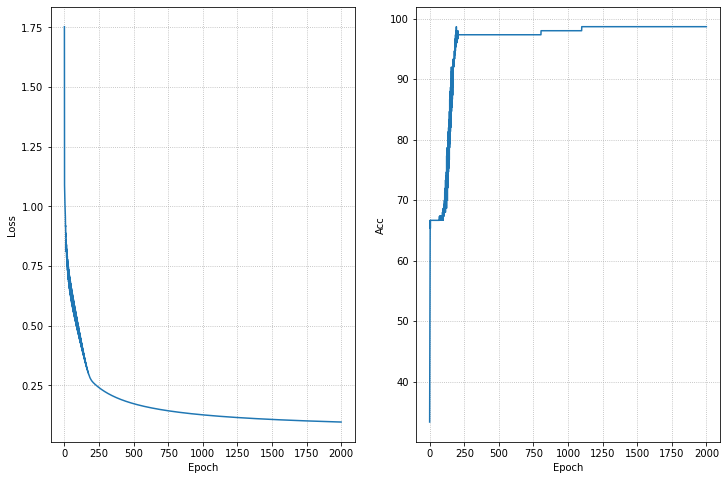

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 설정
torch.manual_seed(1)

# iris 데이터셋 불러오기
from sklearn import datasets
iris = datasets.load_iris()

# x에 꽃 정보 4가지 모두 저장
x_data = iris["data"]
# iris 데이터셋을 one-hot encoding없이 그대로 가져온다
y_data = iris["target"]

# PyTorch로 학습이 가능하도록 torch tensor로 데이터 변환
x_train = torch.FloatTensor(x_data)
y_train = torch.LongTensor(y_data) # 라벨은 정수여야 하므로 LongTensor 사용

# 학습에서 사용될 가중치를 가진 모델 선언, 여기서는 Z = X*W + B 만 선언하면 된다
model = nn.Linear(4,3) # 입력(X)이 4차원, 출력(Z)이 3차원

# 학습에 사용할 optimizer 선언
optimizer = optim.SGD(model.parameters(), lr=1e-1)

# loss 곡선을 그리기 위한 준비
e = []
l = []
a = []

nb_epochs = 2000
for epoch in range(nb_epochs):

    # Z = X*W + B 계산
    Z = model(x_train)

    # 비용 함수
    loss = F.cross_entropy(Z, y_train) # 위에서 계산한 Z와 원핫인코딩을 거치지 않은 y 라벨을 인자로 받음

    # loss로 W, B 개선
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 그래프 그리기 위해 에폭과 loss 값 받아가기
    e = np.append(e, epoch)
    l = np.append(l, loss.detach().numpy())
    _, pred = torch.max(model(x_train), 1)
    acc = 100 * (pred == y_train).sum().item() / len(y_train)
    a = np.append(a, acc)

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Loss: {:.6f} Acc: {:2.2f}%'.format(
            epoch, nb_epochs, loss.item(), acc
        ))
    if epoch == 1999:
        print('Epoch {:4d}/{} Loss: {:.6f} Acc: {:2.2f}%'.format(
            epoch+1, nb_epochs, loss.item(), acc
        ))

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(e,l)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle=":")

plt.subplot(1,2,2)
plt.plot(e,a)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.grid(linestyle=":")

plt.show()